In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, mean_absolute_percentage_error,median_absolute_error
np.random.seed(0)

from regression_module import MultipleLinearRegression

In [13]:
#Global variables
base_data_loc = "../data/regression"

In [3]:
def read_data(file_loc):
    df = pd.read_csv(file_loc)
    return df

def generate_file_location(name,base_data_loc=base_data_loc):
    return os.path.join(base_data_loc, name)

def preprocessing_dev_val(dev_x, val_x, preprocessing_type):
    if preprocessing_type =="standard":
        print("Standardization preprocessing initiated:")
        mean_list = np.mean(dev_x, axis=0)
        std_list = np.std(dev_x,axis=0)
        standard_dev = (dev_x - mean_list) / std_list
        standard_val = (val_x - mean_list) / std_list
        return standard_dev, standard_val
    else:
        print("Normaliztion preprocessing initiated:")
        min_list = np.min(dev_x,axis=0)
        max_list = np.max(dev_x,axis=0)
        normal_dev = (dev_x - min_list) / (max_list - min_list)
        normal_val = (val_x - min_list) / (max_list - min_list)
        return normal_dev, normal_val

def smape_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def linear_regression_metrics(y_true, y_pred):
    r_square = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    smape = smape_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    med_ae = median_absolute_error(y_true, y_pred)

    return r_square, mse, mae, smape, mape, med_ae
    


In [15]:
data_loc_dict = {'fish':generate_file_location("fish.csv"), 'insurance':generate_file_location("insurance.csv"),'real estate':generate_file_location("real_estate.csv"), 'physical activity':generate_file_location("physical_activity_obesity.csv")}

In [34]:
data_name = "real estate"
category_col_list = "".split(",")
print(category_col_list)
target_col_name = "Y house price of unit area"

['']


In [31]:
df_inp = read_data(data_loc_dict[data_name])
print(df_inp.shape)
print(df_inp.head())

(414, 8)
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     12

In [35]:

#dropping the category columns from input data for simplicity
if len(category_col_list) > 0 and len(category_col_list[0])>0:
    df_inp.drop(category_col_list,axis=1,inplace=True)

print("DF after dropping categorical columns")
print(df_inp.head())

df_target = df_inp[target_col_name]
df_inp.drop([target_col_name],axis=1,inplace=True)
df_inp[target_col_name] = df_target
print(df_inp.head())


DF after dropping categorical columns
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                       

In [36]:
dev = []
val = []
np.random.seed(0)
inp_values = df_inp.values
for  i in range(len(inp_values)):
    if np.random.rand() < 0.75:
        dev.append(inp_values[i])
    else:
        val.append(inp_values[i])
dev = np.array(dev)
val = np.array(val)

print(f"dev data shape {dev.shape}")
print(f"val data shape {val.shape}")

y_dev = dev[:,-1]
y_val = val[:,-1]

standardize_x_dev, standardize_x_val = preprocessing_dev_val(dev[:,0:-1], val[:,0:-1],"standard")
print(f"shape of dev data - independent variable - {standardize_x_dev.shape}, dependent variable - {y_dev.shape}")
print(f"shape of val data - independent variable - {standardize_x_val.shape}, dependent variable - {y_val.shape}")
print("checking the preprocessing of standardization")
print("For dev:")
print(np.mean(standardize_x_dev,axis=0))
print(np.std(standardize_x_dev,axis=0))
print("For val:")
print(np.mean(standardize_x_val,axis=0))
print(np.std(standardize_x_val,axis=0))
print("\n")

normal_x_dev, normal_x_val = preprocessing_dev_val(dev[:,0:-1], val[:,0:-1],"normal")
print(f"shape of dev data - independent variable - {normal_x_dev.shape}, dependent variable - {y_dev.shape}")
print(f"shape of val data - independent variable - {normal_x_val.shape}, dependent variable - {y_val.shape}")
print("checking the preprocessing of normalization")
print("For dev:")
print(np.min(normal_x_dev,axis=0))
print(np.max(normal_x_dev,axis=0))
print("For val:")
print(np.min(normal_x_val,axis=0))
print(np.max(normal_x_val,axis=0))


dev data shape (318, 8)
val data shape (96, 8)
Standardization preprocessing initiated:
shape of dev data - independent variable - (318, 7), dependent variable - (318,)
shape of val data - independent variable - (96, 7), dependent variable - (96,)
checking the preprocessing of standardization
For dev:
[-3.25386119e-16 -1.44115537e-12  2.39500942e-16 -9.49624725e-17
  7.47131218e-17  1.51264745e-13 -3.25278867e-12]
[1. 1. 1. 1. 1. 1. 1.]
For val:
[ 0.08678711  0.05893621 -0.10874576 -0.04388197  0.16962501  0.10953223
 -0.00540171]
[1.02427432 1.08632443 1.01618177 1.04642324 1.08731238 1.04225911
 0.97966003]


Normaliztion preprocessing initiated:
shape of dev data - independent variable - (318, 7), dependent variable - (318,)
shape of val data - independent variable - (96, 7), dependent variable - (96,)
checking the preprocessing of normalization
For dev:
[0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1.]
For val:
[ 0.01694915  0.          0.         -0.00408151  0.         -0.01053147
  

### Running Linear Regression when the preprocessing is standardization

In [43]:
np.random.seed(42)
num_iterations = 2000
learning_rate = 0.01

rows, columns = standardize_x_dev.shape
weights = np.random.rand(columns)
bias_term = np.random.rand()
lr = MultipleLinearRegression(learning_rate, num_iterations, standardize_x_dev, y_dev)

cost_list = []
for i in range(num_iterations):
    y_pred = lr.forward_propagation(weights, bias_term)
    #print(y_pred[0:5])
    cost = lr.compute_cost(y_dev, y_pred)
    cost_list.append(cost)
    #print(f"cost for iteration={i+1} is {cost}")
    weights, bias_term = lr.backward_propagation(y_pred, standardize_x_dev, y_dev, weights, bias_term)


df_cost = pd.DataFrame(data=cost_list, columns=["cost"]).reset_index()
df_cost.columns = ["epochs", "cost"]
df_cost["epochs"] = df_cost["epochs"] + 1
df_cost.tail()

,epochs,cost
1995,1996,32.346765
1996,1997,32.346765
1997,1998,32.346765
1998,1999,32.346765
1999,2000,32.346765


<AxesSubplot:title={'center':'Epochs vs cost'}, xlabel='epochs'>

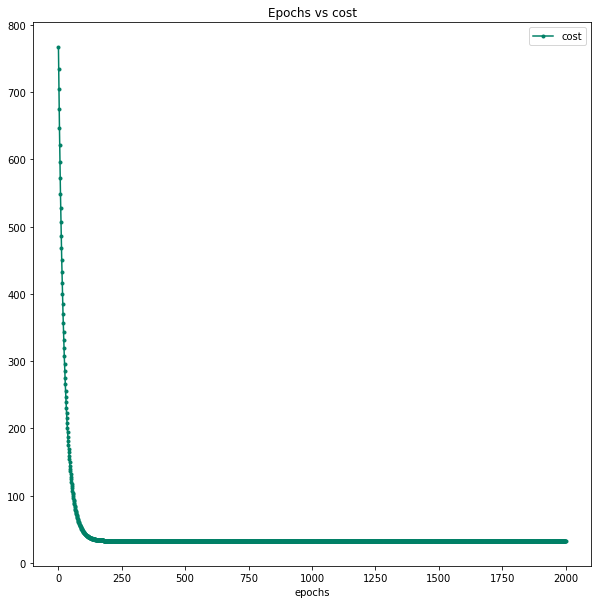

In [44]:
df_cost.plot(x="epochs",y="cost",title="Epochs vs cost",figsize=(10,10),colormap="summer", marker=".")

In [45]:
y_dev_pred = lr.predict(standardize_x_dev, weights, bias_term)
y_val_pred = lr.predict(standardize_x_val, weights, bias_term)

print("training data metrics:")
r_square, mse, mae, smape, mape, med_ae = linear_regression_metrics(y_dev, y_dev_pred)
print("r-square:", r_square)
print("mean square error:", mse)
print("mean absolute error:", mae)
print("SMAPE", smape)
print("median absolute error:", med_ae)

print("\n")

print("test data metrics:")
r_square, mse, mae, smape, mape, med_ae = linear_regression_metrics(y_val, y_val_pred)
print("r-square:", r_square)
print("mean square error:", mse)
print("mean absolute error:", mae)
print("SMAPE", smape)
print("median absolute error:", med_ae)

training data metrics:
r-square: 0.6343114835660106
mean square error: 64.6935303534847
mean absolute error: 5.95471803201223
SMAPE 17.249007373631876
median absolute error: 4.789296431876256


test data metrics:
r-square: 0.4158197596148473
mean square error: 121.79094558048995
mean absolute error: 6.858141595712451
SMAPE 19.39849082860476
median absolute error: 4.988728198678789


### Running Linear Regression when the preprocessing is normalization

In [46]:
np.random.seed(42)
num_iterations = 2000
learning_rate = 0.01

rows, columns = normal_x_dev.shape
weights = np.random.rand(columns)
bias_term = np.random.rand()
lr = MultipleLinearRegression(learning_rate, num_iterations, normal_x_dev, y_dev)

cost_list = []
for i in range(num_iterations):
    y_pred = lr.forward_propagation(weights, bias_term)
    #print(y_pred[0:5])
    cost = lr.compute_cost(y_dev, y_pred)
    cost_list.append(cost)
    #print(f"cost for iteration={i+1} is {cost}")
    weights, bias_term = lr.backward_propagation(y_pred, normal_x_dev, y_dev, weights, bias_term)


df_cost = pd.DataFrame(data=cost_list, columns=["cost"]).reset_index()
df_cost.columns = ["epochs", "cost"]
df_cost["epochs"] = df_cost["epochs"] + 1
df_cost.tail()

,epochs,cost
1995,1996,33.765792
1996,1997,33.765251
1997,1998,33.764711
1998,1999,33.764171
1999,2000,33.763633


<AxesSubplot:title={'center':'Epochs vs cost'}, xlabel='epochs'>

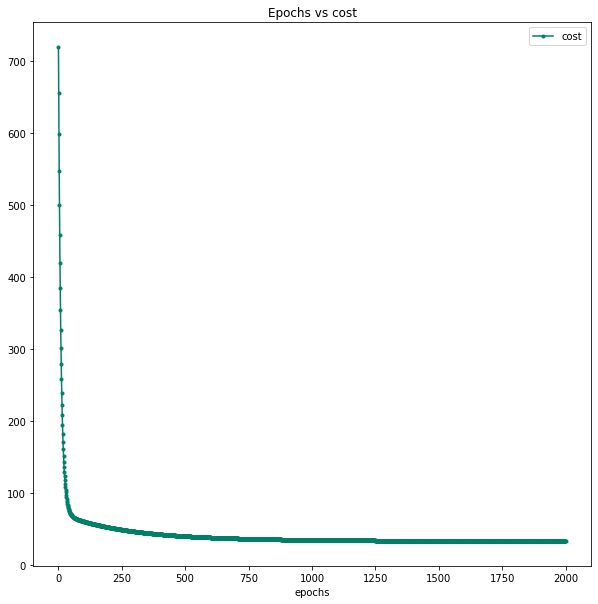

In [47]:
df_cost.plot(x="epochs",y="cost",title="Epochs vs cost",figsize=(10,10),colormap="summer", marker=".")

In [48]:
y_dev_pred = lr.predict(normal_x_dev, weights, bias_term)
y_val_pred = lr.predict(normal_x_val, weights, bias_term)

print("training metrics:")
r_square, mse, mae, smape, mape, med_ae = linear_regression_metrics(y_dev, y_dev_pred)
print("r-square:", r_square)
print("mean square error:", mse)
print("mean absolute error:", mae)
print("SMAPE", smape)
print("median absolute error:", med_ae)

print("\n")

print("test data metrics:")
r_square, mse, mae, smape, mape, med_ae = linear_regression_metrics(y_val, y_val_pred)
print("r-square:", r_square)
print("mean square error:", mse)
print("mean absolute error:", mae)
print("SMAPE", smape)
print("median absolute error:", med_ae)

training metrics:
r-square: 0.6182995148120194
mean square error: 67.52618913289257
mean absolute error: 6.262262551576872
SMAPE 17.652073923763727
median absolute error: 5.438582431330641


test data metrics:
r-square: 0.3711107680331688
mean square error: 131.1119564333952
mean absolute error: 7.117895959098774
SMAPE 19.051063829183978
median absolute error: 5.899650787123399
